# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 646


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?units=Metric&"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# test_city = 'chokurdakh'
# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
      
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f'{url}appid={weather_api_key}&q='

#     response = requests.get(city_url + test_city ).json()

# print(json.dumps(response, indent = 4, sort_keys = True))

   # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

   # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url + city ).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | sento se
City not found. Skipping...
Processing Record 2 of Set 1 | muli
Processing Record 3 of Set 1 | hithadhoo
Processing Record 4 of Set 1 | ampanihy
Processing Record 5 of Set 1 | saskylakh
Processing Record 6 of Set 1 | ocos
Processing Record 7 of Set 1 | shieli
Processing Record 8 of Set 1 | bredasdorp
Processing Record 9 of Set 1 | bucerias
Processing Record 10 of Set 1 | hilo
Processing Record 11 of Set 1 | phan rang
City not found. Skipping...
Processing Record 12 of Set 1 | ilulissat
Processing Record 13 of Set 1 | dwarka
Processing Record 14 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 15 of Set 1 | pizarro
Processing Record 16 of Set 1 | yellowknife
Processing Record 17 of Set 1 | rikitea
Processing Record 18 of Set 1 | constantine
Processing Record 19 of Set 1 | lagoa
Processing Record 20 of Set 1 | waw
Processing Record 21 of Set 1 | amderma
City not found. Sk

In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          601
Lat           601
Lng           601
Max Temp      601
Humidity      601
Cloudiness    601
Wind Speed    601
Country       601
Date          601
dtype: int64

In [6]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,muli,2.9167,73.5667,26.43,78,99,3.98,MV,1670096830
1,hithadhoo,-0.6000,73.0833,27.99,71,100,6.33,MV,1670096831
2,ampanihy,-24.7000,44.7500,23.23,75,84,4.32,MG,1670096831
3,saskylakh,71.9167,114.0833,-13.84,93,100,10.95,RU,1670096822
4,ocos,14.5094,-92.1933,28.45,66,0,2.37,GT,1670096831


In [7]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [8]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,muli,2.9167,73.5667,26.43,78,99,3.98,MV,1670096830
1,hithadhoo,-0.6000,73.0833,27.99,71,100,6.33,MV,1670096831
2,ampanihy,-24.7000,44.7500,23.23,75,84,4.32,MG,1670096831
3,saskylakh,71.9167,114.0833,-13.84,93,100,10.95,RU,1670096822
4,ocos,14.5094,-92.1933,28.45,66,0,2.37,GT,1670096831


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

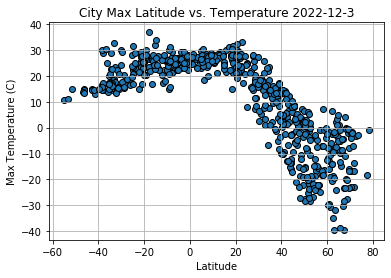

In [49]:
# Build scatter plot for latitude vs. temperature
x_series = city_data_df['Lat']
y_series = city_data_df['Max Temp']

plt.scatter(x_series, y_series, marker='o', edgecolors= 'black')

# Incorporate the other graph properties
plt.title('City Max Latitude vs. Temperature (2022-12-3)')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.grid(True)
# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

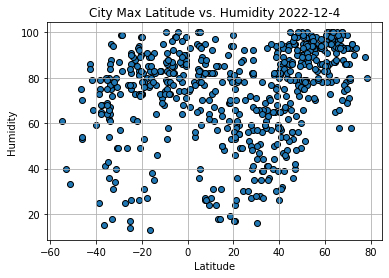

In [51]:
# Build the scatter plots for latitude vs. humidity
x_series = city_data_df['Lat']
y_humid = city_data_df['Humidity']

plt.scatter(x_series, y_humid, marker='o', edgecolors= 'black')

# Incorporate the other graph properties
plt.title('City Max Latitude vs. Humidity (2022-12-4)')
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

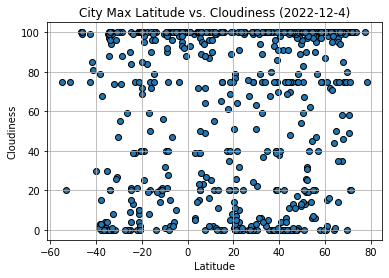

In [52]:
# Build the scatter plots for latitude vs. cloudiness
x_series = city_data_df['Lat']
y_clouds = city_data_df['Cloudiness']

plt.scatter(x_series, y_clouds, marker='o', edgecolors= 'black')

# Incorporate the other graph properties
plt.title('City Max Latitude vs. Cloudiness (2022-12-4)')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

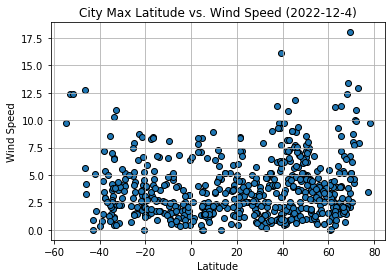

In [53]:
# Build the scatter plots for latitude vs. wind speed
x_series = city_data_df['Lat']
y_wind = city_data_df['Wind Speed']

plt.scatter(x_series, y_wind, marker='o', edgecolors= 'black')

# Incorporate the other graph properties
plt.title('City Max Latitude vs. Wind Speed (2022-12-4)')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.grid(True)


# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
# (slope, intercept, rvalue, pvalue, stderr) = linregress(city_data_df['Lat'], city_data_df['Max Temp'])

In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,muli,2.9167,73.5667,26.43,78,99,3.98,MV,1670096830
3,saskylakh,71.9167,114.0833,-13.84,93,100,10.95,RU,1670096822
4,ocos,14.5094,-92.1933,28.45,66,0,2.37,GT,1670096831
5,shieli,44.1667,66.7500,-12.43,88,11,2.20,KZ,1670096832
7,bucerias,20.7500,-105.3333,30.00,53,79,3.02,MX,1670096737


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,hithadhoo,-0.6000,73.0833,27.99,71,100,6.33,MV,1670096831
2,ampanihy,-24.7000,44.7500,23.23,75,84,4.32,MG,1670096831
6,bredasdorp,-34.5322,20.0403,14.34,62,88,1.29,ZA,1670096832
13,rikitea,-23.1203,-134.9692,23.52,73,39,6.36,PF,1670096760
17,port augusta,-32.5000,137.7667,23.53,31,0,2.36,AU,1670096835


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.8374014714488017


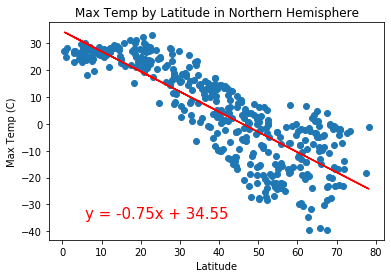

In [44]:
# Linear regression on Northern Hemisphere
north_x = northern_hemi_df['Lat']
north_y = northern_hemi_df['Max Temp']

(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_hemi_df['Lat'], northern_hemi_df['Max Temp'])

regress_vales = north_x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(f'The r-value is: {rvalue}')
plt.scatter(north_x, north_y)
plt.plot(north_x, regress_vales, color= 'r')
plt.annotate(line_eq, (5.8, -35), fontsize= 15, color='red')
plt.xlabel('Latitude')
plt.ylabel('Max Temp (C)')
plt.title('Max Temp by Latitude in Northern Hemisphere')
plt.show()


The r-value is: 0.5846035116221274


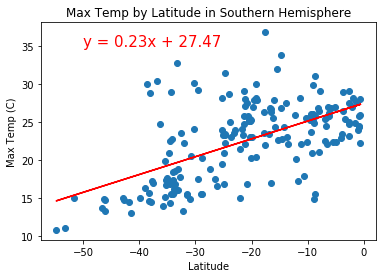

In [45]:
# Linear regression on Southern Hemisphere
south_x = southern_hemi_df['Lat']
south_y = southern_hemi_df['Max Temp']

(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_hemi_df['Lat'], southern_hemi_df['Max Temp'])

regress_vales = south_x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(f'The r-value is: {rvalue}')
plt.scatter(south_x, south_y)
plt.plot(south_x, regress_vales, color= 'r')
plt.annotate(line_eq, (-50, 35), fontsize= 15, color='red')
plt.xlabel('Latitude')
plt.ylabel('Max Temp (C)')
plt.title('Max Temp by Latitude in Southern Hemisphere')
plt.show()

**Discussion about the linear relationship:** Based on the data set analyzed both the Northern or Southern Hemispheres appear to have some correlation between Max Temperature and Latitude. The Northern Hemisphere has a strong negative relationship between Max Temperature and Latitude while the Southern Hemisphere a weaker positive correlation between Max Temperature and Latitude.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.42071454659469626


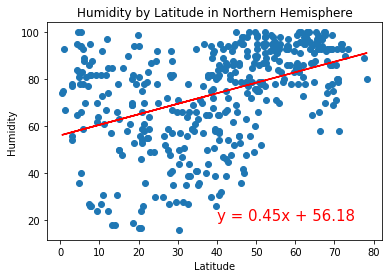

In [26]:
# Northern Hemisphere
north_x = northern_hemi_df['Lat']
north_y = northern_hemi_df['Humidity']

(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_hemi_df['Lat'], northern_hemi_df['Humidity'])

regress_vales = north_x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(f'The r-value is: {rvalue}')
plt.scatter(north_x, north_y)
plt.plot(north_x, regress_vales, color= 'r')
plt.annotate(line_eq, (40, 20), fontsize= 15, color='red')
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('Humidity by Latitude in Northern Hemisphere')
plt.show()

The r-value is: 0.3649002889739457


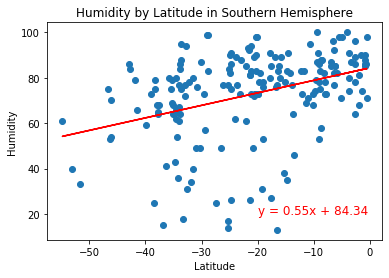

In [31]:
# Southern Hemisphere
south_x = southern_hemi_df['Lat']
south_y = southern_hemi_df['Humidity']

(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_hemi_df['Lat'], southern_hemi_df['Humidity'])

regress_vales = south_x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(f'The r-value is: {rvalue}')
plt.scatter(south_x, south_y)
plt.plot(south_x, regress_vales, color= 'r')
plt.annotate(line_eq, (-20, 20), fontsize= 12, color='red')
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('Humidity by Latitude in Southern Hemisphere')
plt.show()

**Discussion about the linear relationship:** Based on the data set analyzed neiher the Northern or Southern Hemispheres appear to have strong correlation between Cloudienss and Latitude.  Both hemispheres returned weak rvalues.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.1977308262411427


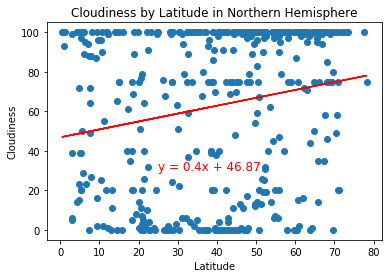

In [34]:
# Northern Hemisphere
north_x = northern_hemi_df['Lat']
north_y = northern_hemi_df['Cloudiness']

(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_hemi_df['Lat'], northern_hemi_df['Cloudiness'])

regress_vales = north_x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(f'The r-value is: {rvalue}')
plt.scatter(north_x, north_y)
plt.plot(north_x, regress_vales, color= 'r')
plt.annotate(line_eq, (25, 30), fontsize= 12, color='red')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('Cloudiness by Latitude in Northern Hemisphere')
plt.show()

The r-value is: 0.23058759097062412


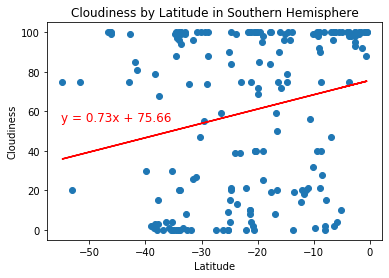

In [38]:
# Southern Hemisphere
south_x = southern_hemi_df['Lat']
south_y = southern_hemi_df['Cloudiness']

(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_hemi_df['Lat'], southern_hemi_df['Cloudiness'])

regress_vales = south_x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(f'The r-value is: {rvalue}')
plt.scatter(south_x, south_y)
plt.plot(south_x, regress_vales, color= 'r')
plt.annotate(line_eq, (-55, 55), fontsize= 12, color='red')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('Cloudiness by Latitude in Southern Hemisphere')
plt.show()

**Discussion about the linear relationship:** Based on the data set analyzed neiher the Northern or Southern Hemispheres appear to have any correlation between Cloudienss and Latitude.  Both hemispheres returned low rvalues.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.19422281352243634


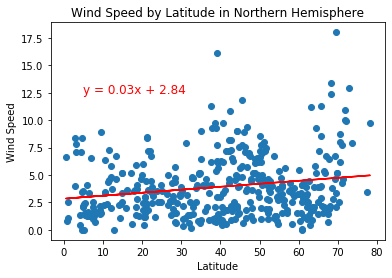

In [41]:
# Northern Hemisphere
north_x = northern_hemi_df['Lat']
north_y = northern_hemi_df['Wind Speed']

(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_hemi_df['Lat'], northern_hemi_df['Wind Speed'])

regress_vales = north_x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(f'The r-value is: {rvalue}')
plt.scatter(north_x, north_y)
plt.plot(north_x, regress_vales, color= 'r')
plt.annotate(line_eq, (5, 12.5), fontsize= 12, color='red')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('Wind Speed by Latitude in Northern Hemisphere')
plt.show()

The r-value is: -0.30968736382073825


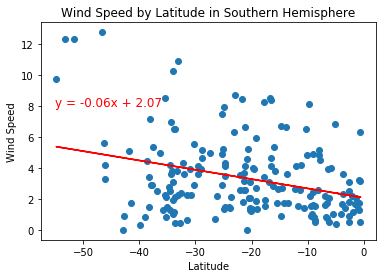

In [48]:
# Southern Hemisphere
south_x = southern_hemi_df['Lat']
south_y = southern_hemi_df['Wind Speed']

(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_hemi_df['Lat'], southern_hemi_df['Wind Speed'])

regress_vales = south_x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(f'The r-value is: {rvalue}')
plt.scatter(south_x, south_y)
plt.plot(south_x, regress_vales, color= 'r')
plt.annotate(line_eq, (-55, 8), fontsize= 12, color='red')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('Wind Speed by Latitude in Southern Hemisphere')
plt.show()

**Discussion about the linear relationship:** Based on the data set analyzed neiher the Northern or Southern Hemispheres appear to have any correlation, positive or negative, between Cloudienss and Latitude.  Both hemispheres returned low rvalues.